In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../Data/Latest_Data_Science_Salaries.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [5]:
# Explore the dataset
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Basic statistics of numerical columns
statistics = df.describe()
print("Basic Statistics:\n", statistics)

# Data cleaning and preprocessing
# Convert Salary to USD for uniformity
df['Salary in USD'] = df.apply(lambda row: row['Salary'] if row['Salary Currency'] == 'United States Dollar' else row['Salary']*1.18 if row['Salary Currency'] == 'Euro' else row['Salary']*1.39 if row['Salary Currency'] == 'British Pound Sterling' else row['Salary']*0.011 if row['Salary Currency'] == 'Indian Rupee' else row['Salary'], axis=1)


Missing Values:
 Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64
Basic Statistics:
              Salary  Salary in USD         Year
count  3.300000e+03    3300.000000  3300.000000
mean   2.046623e+05  142095.983939  2022.495455
std    7.279383e+05   69028.235512     0.716355
min    1.400000e+04   15000.000000  2020.000000
25%    9.416900e+04   90000.000000  2022.000000
50%    1.400000e+05  136000.000000  2023.000000
75%    1.900000e+05  185000.000000  2023.000000
max    3.040000e+07  450000.000000  2023.000000


In [6]:
# Data analysis
# Most popular job titles
popular_jobs = df['Job Title'].value_counts().nlargest(5)
print("Most Popular Job Titles:\n", popular_jobs)

Most Popular Job Titles:
 Job Title
Data Engineer                702
Data Scientist               635
Data Analyst                 459
Machine Learning Engineer    300
Analytics Engineer           132
Name: count, dtype: int64


In [7]:
# Highest paying job titles
highest_paying_jobs = df.groupby('Job Title')['Salary in USD'].median().nlargest(5)
print("Highest Paying Job Titles:\n", highest_paying_jobs)


Highest Paying Job Titles:
 Job Title
Analytics Engineering Manager     451750.0
Data Science Tech Lead            375000.0
Managing Director Data Science    300000.0
AWS Data Architect                258000.0
Cloud Data Architect              250000.0
Name: Salary in USD, dtype: float64


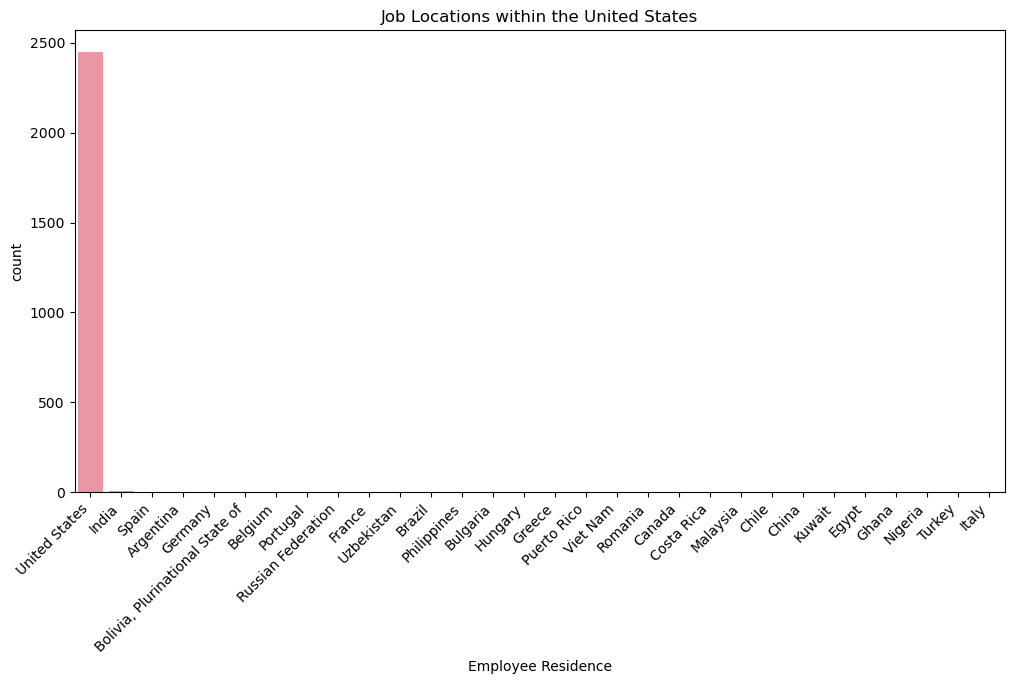

In [10]:
# Job location analysis for locations within the United States
us_locations = df[df['Company Location'] == 'United States']

plt.figure(figsize=(12, 6))
sns.countplot(x='Employee Residence', data=us_locations, order=us_locations['Employee Residence'].value_counts().index)
plt.title('Job Locations within the United States')
plt.xticks(rotation=45, ha='right')
plt.show()


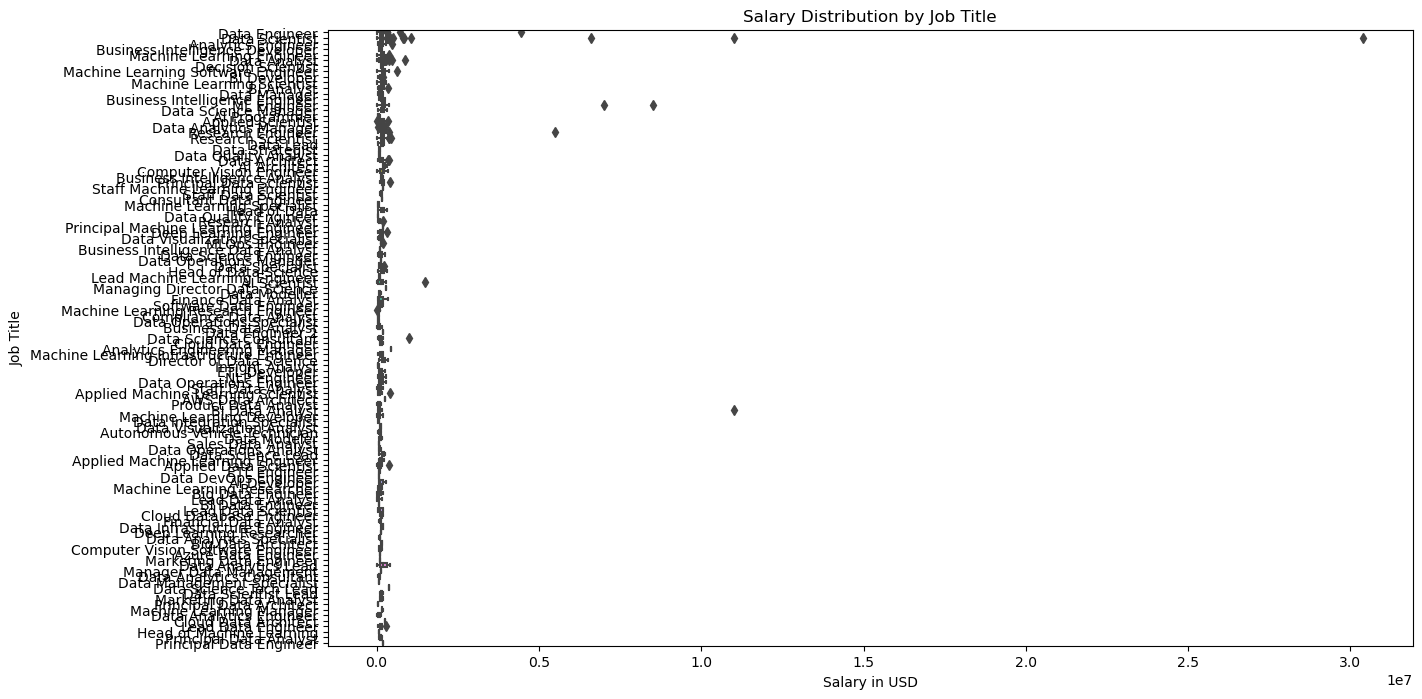

In [9]:
# Salary distribution by job title
plt.figure(figsize=(14, 8))
sns.boxplot(x='Salary in USD', y='Job Title', data=df)
plt.title('Salary Distribution by Job Title')
plt.show()